# Visualize simulation result and generate report (pdf)

## choose path under directory /result

In [1]:
timestamp = "20yy-mm-dd_HH-MM-SS" # your timestamp here
path = f"result/{timestamp}"

## import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
from mpl_toolkits.mplot3d import Axes3D
import yaml
import os


## Load simulation parameters from params.yaml

In [3]:
with open(f"{path}/params.yaml") as f:
    params = yaml.safe_load(f)

## Load csv file

In [4]:
file_list = os.listdir(path)
csv = [f for f in file_list if ".csv" in f]
if len(csv) != 1:
    print("No csv file or more than two csv files!")
df = pd.read_csv(f"{path}/{csv[0]}")

In [5]:
df

,wavelength_gen,wavelength_esc,ref_N,x0,y0,z0,x,y,z,kx,ky,kz
0,986.094727,986.094727,0,1.248603,1.252800,0.579482,1.334604e+00,1.299758e+00,9.860032e-09,0.212184,0.115857,-0.970338
1,997.182555,997.182555,0,1.247110,1.060003,7.752525,6.098372e-01,8.533802e-09,7.637868e+00,-0.743924,-0.654723,-0.133845
2,989.457535,991.677402,0,1.244249,1.261791,3.852403,7.390176e-09,2.571723e+00,4.976724e+00,-0.213949,0.641093,0.737038
3,1024.522822,1021.917322,13,1.274833,1.211412,9.428891,2.487842e+00,2.876571e+00,7.428502e-09,-0.355020,-0.903463,-0.240239
4,1006.137154,1030.909546,4,1.183554,1.443560,2.117377,8.249046e-09,9.070165e-01,8.536095e+00,-0.572873,0.510645,0.641138
...,...,...,...,...,...,...,...,...,...,...,...,...
992,1019.032090,1014.993441,8,1.099278,1.147787,5.291195,2.541267e+00,9.931077e-09,1.067713e+00,0.148643,-0.985453,-0.082387
993,958.125526,958.125526,0,1.268032,1.284802,5.116772,3.973008e-01,8.006841e-09,4.709402e+00,-0.786823,-0.495381,-0.368113
994,955.609802,955.609802,0,1.258028,1.251884,4.676197,1.838167e+00,7.699243e-09,3.815937e+00,0.517349,-0.379246,-0.767152
995,1005.340590,1032.044844,2,1.345042,1.227224,3.105074,1.984312e+00,3.000000e+00,3.746440e+00,0.238117,0.706896,-0.666032


In [6]:
mean_gen = df["wavelength_gen"].mean()
err_gen = df["wavelength_gen"].std() / np.sqrt(len(df))
mean_esc = df["wavelength_esc"].mean()
err_esc = df["wavelength_esc"].std() / np.sqrt(len(df))
N = int(float(params["simulation"]["N"]))
Nesc = df.shape[0]
escape_eff = Nesc / N
print(f"Generated: {mean_gen:.2f} +- {err_gen:.2f}")
print(f"Escaped: {mean_esc:.2f} +- {err_esc:.2f}")
print(f"Escaping rays: {Nesc} / {N} => {escape_eff * 100}%")

Generated: 994.75 +- 0.86
Escaped: 1001.67 +- 0.84
Escaping rays: 997 / 1000 => 99.7%


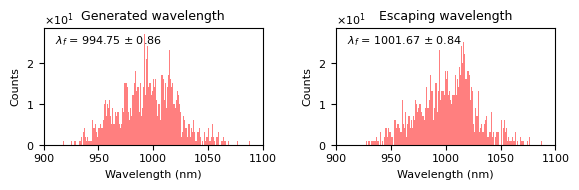

In [8]:
TITLE_FONT_SIZE = 9
LABEL_FONT_SIZE = 8
TICKS_FONT_SIZE = 8
TEXT_FONT_SIZE = 8

wl_min = 900
wl_max = 1100
fig1, ax1 = plt.subplots(1, 2, figsize=(6, 2))
ax1[0].set_title("Generated wavelength", fontsize=TITLE_FONT_SIZE)
ax1[0].hist(df["wavelength_gen"], range = (wl_min, wl_max), bins=wl_max - wl_min + 1,  color="red", alpha=0.5, label="generated")
ax1[1].set_title("Escaping wavelength", fontsize=TITLE_FONT_SIZE)
ax1[1].hist(df["wavelength_esc"], range = (900, 1100), bins=200,  color="red", alpha=0.5, label="escaped")
for a in ax1:
    a.set_xlabel("Wavelength (nm)", fontsize=LABEL_FONT_SIZE)
    a.set_ylabel("Counts", fontsize=LABEL_FONT_SIZE)
    a.set_xlim(wl_min, wl_max)
    a.tick_params(axis="both", which="major", labelsize=TICKS_FONT_SIZE)
    ymax = max(ax1[0].get_ylim()[1], ax1[1].get_ylim()[1])
    a.set_ylim(0, ymax)
    a.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    a.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
    a.yaxis.offsetText.set_fontsize(TICKS_FONT_SIZE)
ax1[0].text(x=0.05, y=0.95, s=f"$\lambda_f$ = {mean_gen:.2f} $\pm$ {err_gen:.2f}", transform=ax1[0].transAxes, verticalalignment="top", fontsize=TEXT_FONT_SIZE)
ax1[1].text(x=0.05, y=0.95, s=f"$\lambda_f$ = {mean_esc:.2f} $\pm$ {err_esc:.2f}", transform=ax1[1].transAxes, verticalalignment="top", fontsize=TEXT_FONT_SIZE)
fig1.tight_layout()
plt.show()

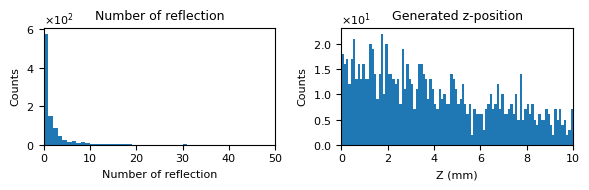

In [9]:
Nref_max = 50

fig2, ax2 = plt.subplots(1, 2, figsize=(6, 2))
ax2[0].hist(df["ref_N"], bins=np.arange(0, Nref_max + 1))
ax2[0].set_title("Number of reflection", fontsize=TITLE_FONT_SIZE)
ax2[0].set_xlabel("Number of reflection", fontsize=LABEL_FONT_SIZE)
ax2[0].set_ylabel("Counts", fontsize=LABEL_FONT_SIZE)
ax2[0].set_xlim(0, Nref_max)

ax2[1].hist(df["z0"], bins=np.arange(0, params["crystal"]["L"] + 0.1, 0.1))
ax2[1].set_title("Generated z-position", fontsize=TITLE_FONT_SIZE)
ax2[1].set_xlabel("Z (mm)", fontsize=LABEL_FONT_SIZE)
ax2[1].set_ylabel("Counts", fontsize=LABEL_FONT_SIZE)
if params["crystal"]["shape"] == "cuboid":
    ax2[1].set_xlim(0, params["crystal"]["L"])
elif params["crystal"]["shape"] == "brewster":
    ax2[1].set_xlim(0, params["crystal"]["L"]*1.1)

for a in ax2:
    a.tick_params(axis="both", which="major", labelsize=TICKS_FONT_SIZE)
    a.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    a.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
    a.yaxis.offsetText.set_fontsize(TICKS_FONT_SIZE)

fig2.tight_layout()
plt.show()

## 3D visualization

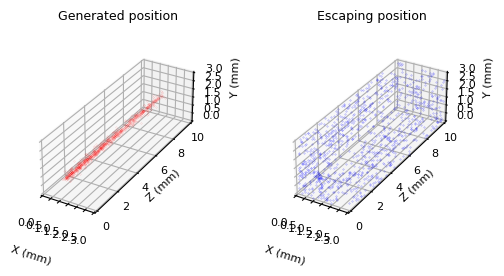

In [10]:
W = params["crystal"]["W"]
H = params["crystal"]["H"]
L = params["crystal"]["L"]

if df.shape[0] > 20000:
    df = df.iloc[:20000]

fig3 = plt.figure(figsize=(6, 3))
ax3_1 = fig3.add_subplot(121, projection="3d")
ax3_2 = fig3.add_subplot(122, projection="3d")
# fig3.subplots_adjust(left=0.05, bottom=0.15, right=0.8, top=0.9, wspace=0.0)

ax3_1.set_title("Generated position", fontsize=TITLE_FONT_SIZE)
ax3_2.set_title("Escaping position", fontsize=TITLE_FONT_SIZE)
ax3_1.plot(xs=df.x0, ys=df.z0, zs=df.y0, ls="None", marker=".", markersize=0.2, alpha=0.5, color="red")
ax3_2.plot(xs=df.x, ys=df.z, zs=df.y, ls="None", marker=".", markersize=0.5, alpha=0.5, color="blue")
ratio_y = H / W
ratio_z = L / W

for ax in [ax3_1, ax3_2]:
    ax.set_xlim(0, W)
    if params["crystal"]["shape"] == "cuboid":
        ax.set_ylim(0, L)
    elif params["crystal"]["shape"] == "brewster":
        ax.set_ylim(0, L*1.25)
    ax.set_zlim(0, H)
    ax.set_xlabel("X (mm)", fontsize=LABEL_FONT_SIZE)
    ax.set_ylabel("Z (mm)", fontsize=LABEL_FONT_SIZE)
    ax.set_zlabel("Y (mm)", fontsize=LABEL_FONT_SIZE)
    ax.tick_params(axis="both", which="major", labelsize=TICKS_FONT_SIZE)
    # ax.set_aspect("equal")

ax3_1.set_box_aspect((np.ptp(df.x), np.ptp(df.x * ratio_z), np.ptp(df.x * ratio_y)))
ax3_2.set_box_aspect((np.ptp(df.x), np.ptp(df.x * ratio_z), np.ptp(df.x * ratio_y)))
# fig3.tight_layout()
plt.show()

## generate report pdf

In [11]:
from io import BytesIO
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4, portrait
from reportlab.lib.units import mm
from reportlab.graphics import renderPDF
from svglib.svglib import svg2rlg

In [12]:
file = f"{path}/report.pdf"
paper = canvas.Canvas(file, pagesize=portrait(A4))

# timestamp
paper.setFont("Helvetica", 11)
paper.drawString(15 * mm, 280 * mm, f"{timestamp}")

# parameters
paper.setFont("Helvetica", 11)

# load parameters
step = params["simulation"]["step"]
Nref_max = params["simulation"]["max_ref_count"]
if Nref_max == 0:
    Nref_max = "Inf"
pump_depletion = params["simulation"]["pump_depletion"]

name = params["crystal"]["name"]
temperature = params["crystal"]["T"]
n1 = params["crystal"]["n1"]
n2 = params["crystal"]["n2"]
n3 = params["crystal"]["n3"]
cation_density = params["crystal"]["cation_density"]
doping_level = params["crystal"]["doping_level"]
correction_coeff = params["crystal"]["correction_coeff"]
W = params["crystal"]["W"]
H = params["crystal"]["H"]
L = params["crystal"]["L"]
shape = params["crystal"]["shape"]
angle = params["crystal"]["angle"]
caxis = params["crystal"]["caxis"]
baxis = params["crystal"]["baxis"]
QE = params["crystal"]["QE"]
alpha_b = params["crystal"]["alpha_b"]

dist = params["beam"]["distribution"]
d = params["beam"]["d"]
wl = params["beam"]["wl"]
k = params["beam"]["k"]
p0 = params["beam"]["p0"]
E = params["beam"]["E"]

paper.drawString(15 * mm, 270 * mm, f"Simulation: N={N}, step size={step} mm, max ref. count={Nref_max}, pump depletion={pump_depletion}")
paper.drawString(15 * mm, 260 * mm, "Crystal:")
paper.drawString(30 * mm, 260 * mm, f"{name}, {doping_level}% (x {cation_density} cm^-3 x {correction_coeff}) W={W}, H={H}, L={L} (mm), {temperature} K, {shape}, angle={angle}°,")
paper.drawString(30 * mm, 255 * mm, f"caxis={caxis}, baxis={baxis}, n1={n1}, n2={n2}, n3={n3},")
paper.drawString(30 * mm, 250 * mm, f"quantum efficiency={QE}, background absorption={alpha_b} cm^-1")
paper.drawString(15 * mm, 240 * mm, "Beam:")
paper.drawString(30 * mm, 240 * mm, f"{dist}, diameter={d} mm, wavelength={wl} nm, k-vector={k},")
paper.drawString(30 * mm, 235 * mm, f"p0={p0}, polarization={E}")

paper.drawString(50 * mm, 225 * mm, f"Escaping rays: {Nesc} / {N} => Escape efficiency={escape_eff * 100}%")
paper.drawString(50 * mm, 220 * mm, f"External quantum efficiency: {escape_eff * QE * 100}%")

imgdata1 = BytesIO()
fig1.savefig(imgdata1, format="svg")
imgdata1.seek(0)
imgdata2 = BytesIO()
fig2.savefig(imgdata2, format="svg")
imgdata2.seek(0)
imgdata3 = BytesIO()
fig3.savefig(imgdata3, format="svg")
imgdata3.seek(0)

drawing1=svg2rlg(imgdata1)
drawing2=svg2rlg(imgdata2)
drawing3=svg2rlg(imgdata3)

renderPDF.draw(drawing1, paper, 10 * mm, 155 * mm)
renderPDF.draw(drawing2, paper, 10 * mm, 95 * mm)
renderPDF.draw(drawing3, paper, 10 * mm, 0 * mm)

paper.save()